## Logistic Regression

In [ ]:
"""
# Logistic Regression Overview

## What is Logistic Regression?

Logistic regression is a statistical method used for binary classification problems, where the outcome variable is categorical and can take on two possible outcomes (e.g., success/failure, yes/no, 0/1). Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given input point belongs to a particular category.

The logistic function (also known as the sigmoid function) is used to map predicted values to probabilities. The output of the logistic regression model is a value between 0 and 1, which can be interpreted as the probability of the positive class.

## How Does Logistic Regression Work?

1. **Model Representation**:
   Logistic regression models the relationship between the input features (independent variables) and the binary outcome (dependent variable) using the logistic function. The model can be represented mathematically as:
   \[
   P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
   \]
   where:
   - \( P(Y=1|X) \) is the probability that the output is 1 given the input features \( X \).
   - \( \beta_0 \) is the intercept (bias term).
   - \( \beta_1, \beta_2, ..., \beta_n \) are the coefficients for the input features \( X_1, X_2, ..., X_n \).

2. **Training the Model**:
   The model is trained using a dataset with known outcomes. The goal is to find the best-fitting parameters (coefficients) that minimize the difference between the predicted probabilities and the actual outcomes. This is typically done using a method called Maximum Likelihood Estimation (MLE).

3. **Making Predictions**:
   After training, the model can be used to predict the probability of the positive class for new input data. A threshold (commonly 0.5) is applied to convert the predicted probabilities into binary class labels.

## Uses of Logistic Regression

- **Binary Classification**: Logistic regression is primarily used for binary classification tasks, such as:
  - Email spam detection (spam vs. not spam)
  - Disease diagnosis (disease present vs. disease absent)
  - Customer churn prediction (churn vs. no churn)

- **Probabilistic Interpretation**: It provides a probabilistic framework, allowing users to understand the likelihood of an event occurring.

- **Feature Importance**: The coefficients obtained from logistic regression can be interpreted to understand the influence of each feature on the outcome.

## Limitations of Logistic Regression

- **Linearity Assumption**: Logistic regression assumes a linear relationship between the input features and the log-odds of the outcome. If the relationship is not linear, the model may not perform well.

- **Binary Outcomes**: It is designed for binary classification problems. While it can be extended to multiclass problems using techniques like one-vs-all, it is not inherently suited for them.

- **Sensitive to Outliers**: Logistic regression can be sensitive to outliers, which can disproportionately affect the model's performance.

- **Feature Scaling**: The model may require feature scaling (normalization or standardization) for optimal performance, especially when features are on different scales.

- **Multicollinearity**: If the input features are highly correlated, it can lead to unstable estimates of the coefficients.

## Conclusion

Logistic regression is a powerful and widely used method for binary classification tasks in machine learning. Its simplicity, interpretability, and probabilistic nature make it a popular choice for many applications. However, it is essential to be aware of its limitations and assumptions to ensure that it is applied appropriately.
"""

Iteration 1: Loss = 0.6931471805599453
Iteration 101: Loss = 0.22206775654069433
Iteration 201: Loss = 0.16676742888552556
Iteration 301: Loss = 0.14244606238966853
Iteration 401: Loss = 0.12781993922782023
Iteration 501: Loss = 0.11770144504285321
Iteration 601: Loss = 0.11011643175321152
Iteration 701: Loss = 0.10412750162229355
Iteration 801: Loss = 0.09922410746921104
Iteration 901: Loss = 0.09510073189885501
Iteration 1000: Loss = 0.09159449696291773
Final coefficients: [ 4.27882586  1.9746074  -1.70058587]


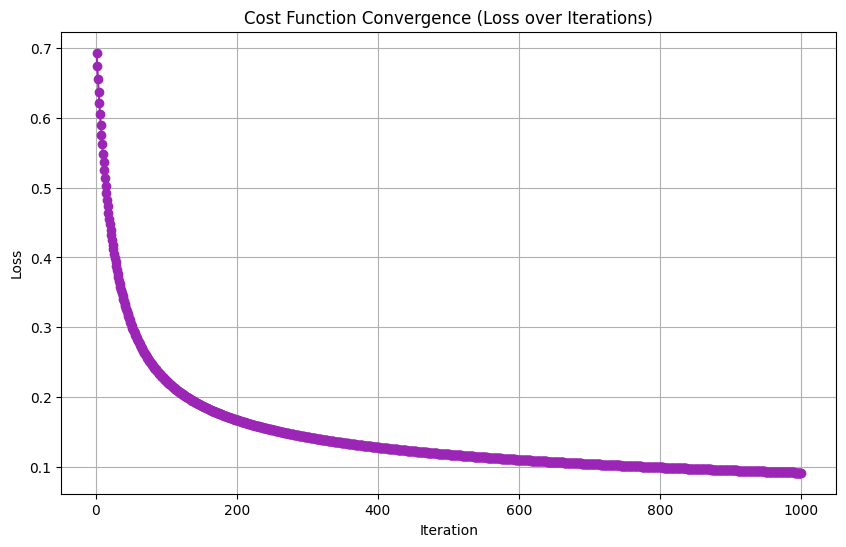

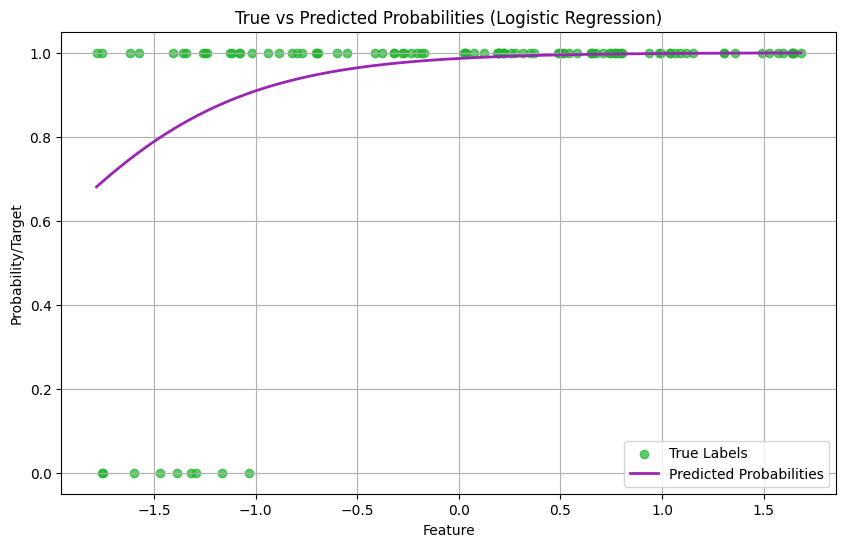

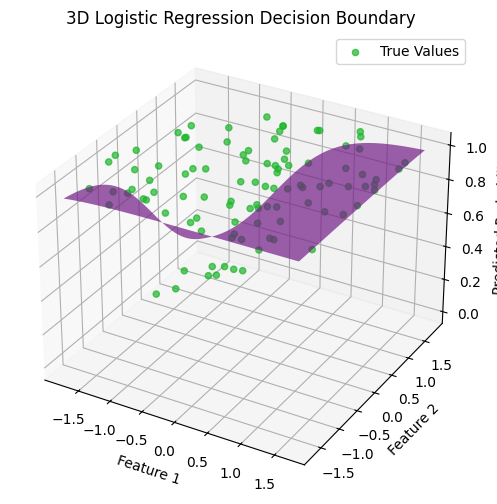

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.preprocessing import StandardScaler  # For feature scaling

class LogisticRegressionModel:
    def __init__(self, alpha=0.01, max_iter=1000):
        self.alpha = alpha
        self.max_iter = max_iter
        self.coefficients = None  # Final weight vector
        self.loss_history = []  # Track loss for plotting

    def sigmoid_function(self, z):
        return 1 / (1 + np.exp(-z))

    def train(self, X, Y):
        num_samples, num_features = X.shape
        self.coefficients = np.zeros((num_features, 1))  # Initialize weights

        for iteration in range(self.max_iter):
            linear_output = X @ self.coefficients
            predicted_probs = self.sigmoid_function(linear_output)
            error = predicted_probs - Y

            gradient = (1 / num_samples) * (X.T @ error)
            self.coefficients -= self.alpha * gradient

            # Calculate and store loss for monitoring
            loss = - (1 / num_samples) * np.sum(Y * np.log(predicted_probs) + (1 - Y) * np.log(1 - predicted_probs))
            self.loss_history.append(loss)

            if iteration % 100 == 0 or iteration == self.max_iter - 1:
                print(f"Iteration {iteration + 1}: Loss = {loss}")

    def predict(self, X):
        linear_output = X @ self.coefficients
        predicted_probs = self.sigmoid_function(linear_output)
        return (predicted_probs >= 0.5).astype(int)

# Plotting Functions
def plot_loss_convergence(loss_history):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(loss_history) + 1), loss_history, color='#9B26B6', marker='o')
    plt.title('Cost Function Convergence (Loss over Iterations)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

import numpy as np
import matplotlib.pyplot as plt

def plot_true_vs_predicted(X, Y, model):
    """Plot the true vs predicted probabilities for binary classification."""
    plt.figure(figsize=(10, 6))

    plt.scatter(X[:, 1], Y, color='#1DB52B', label='True Labels', alpha=0.7)

    x_line = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    x_line = x_line.reshape(-1, 1)
    x_line_with_bias = np.hstack([np.ones((x_line.shape[0], 1)), x_line, np.zeros_like(x_line)])  # Add bias and dummy feature

    y_line_probs = model.sigmoid_function(x_line_with_bias @ model.coefficients)

    plt.plot(x_line, y_line_probs, color='#9B26B6', label='Predicted Probabilities', linewidth=2)

    plt.title('True vs Predicted Probabilities (Logistic Regression)')
    plt.xlabel('Feature')
    plt.ylabel('Probability/Target')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_3d_decision_boundary(X, Y, model):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 1], X[:, 2], Y, color='#1DB52B', label='True Values', alpha=0.7)
    x1_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
    x2_range = np.linspace(np.min(X[:, 2]), np.max(X[:, 2]), 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    X_grid = np.c_[np.ones_like(x1_grid.flatten()), x1_grid.flatten(), x2_grid.flatten()]

    Y_grid_prob = model.sigmoid_function(X_grid @ model.coefficients)
    Y_grid_prob = Y_grid_prob.reshape(x1_grid.shape)

    ax.plot_surface(x1_grid, x2_grid, Y_grid_prob, color='#9B26B6', alpha=0.7, rstride=100, cstride=100)
    ax.set_title('3D Logistic Regression Decision Boundary')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Predicted Probability')
    ax.legend()
    plt.show()

# Example usage
if __name__ == "__main__":
    np.random.seed(0)
    num_samples = 100
    num_features = 2
    X = np.random.rand(num_samples, num_features)
    X = np.hstack((np.ones((num_samples, 1)), X))  # Add bias term
    true_coefficients = np.array([[0.5], [1.5], [-1.0]])
    Y = (X @ true_coefficients + np.random.normal(0, 0.1, (num_samples, 1)) > 0).astype(int)

    # Standardize features for better performance
    scaler = StandardScaler()
    X[:, 1:] = scaler.fit_transform(X[:, 1:])

    # Create and train the logistic regression model
    model = LogisticRegressionModel(alpha=0.1, max_iter=1000)
    model.train(X, Y)

    Y_pred = model.predict(X)

    print("Final coefficients:", model.coefficients.flatten())

    plot_loss_convergence(model.loss_history)
    plot_true_vs_predicted(X, Y, model)
    plot_3d_decision_boundary(X, Y, model)
